<a href="https://colab.research.google.com/github/ecierobatto/Esther_Robert_Week_9_IP/blob/main/Moringa_School_Independent_Project_Week_9_12_Esther_Robert_Naive_Bayes_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes- Exploratory Data Analysis

## Specifying the Question
We will train a classifier to detect e-mail spam. Here are the specifications:

**Objective**: predict whether each e-mail is spam or not.

**Possible classes**: spam: 1, non-spam: 0

**Features**: all 57 features

## Defining the Metric for Success
The f1_score and accuracy have been used to measure the predictive power of the model before and after optimization.

## Understanding the Context
This Dataset focuses on classifying Email as Spam or Non-Spam by frequency of word or character. The dataset was developed at Hewlett-Packard Labs and was donated by George Forman on July 1999 (Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt, 1999). The dataset contains 4601 instances and 58 variables. It contains two fields “Spam” and “Not Spam” for prediction. It is multivariate, real dataset mainly used for classification of attributes.

## Recording the Experimental Design

1. Read and explore the given dataset.

2. Define the appropriateness of the available data to answer the given question. 

3. Find and deal with outliers, anomalies, and missing data within the dataset.
 
4. Perform univariate, bivariate and multivariate analysis recording your observations.  

5. Randomly partition the dataset into two parts i.e 80 - 20  sets.

6. For the given dataset, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform Naive Bayes classification.

7. Compute the accuracy (percentage of correct classification).

8. Report the confusion matrix of each classifier.

9. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

10. Suggest and apply at least one of the optimization techniques that you learned earlier this week.

11. Provide further recommendations.

## Data Relevance

Dataset Source: [link text](https://archive.ics.uci.edu/ml/datasets/Spambase)

 **Rows**: 4,601 # **Columns**: 58

**Target**: class

**Features**
Numeric: word_freq_make, word_freq_address, word_freq_all, word_freq_3d, word_freq_our, word_freq_over, word_freq_remove, word_freq_internet, word_freq_order, word_freq_mail, word_freq_receive, word_freq_will, word_freq_people, word_freq_report, word_freq_addresses, word_freq_free, word_freq_business, word_freq_email, word_freq_you, word_freq_credit, ...

**Attributes Information:**

Out of 58 variables, 48 attributes are continuous, real and determines the frequency of words like “data”, “telnet”, “technology”, “1999” and many more, 6 attributes are continuous and real and characters like “;”, “(”, “[“ and so on, 1 is continuous and real attribute named “capital_run_length_longest” which determines length of longest uninterrupted sequence of capital letters, 1 continuous and integer attribute named capital_run_length_total which determines sum of length of uninterrupted sequences of capital letters and last attribute is Class which determines whether it is spam or not by 0 and 1.

# Importing Libraries

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
%matplotlib inline


# Loading Dataset

In [94]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "spambase.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')
    

File Name                                             Modified             Size
spambase.DOCUMENTATION                         1999-08-17 11:48:54         6429
spambase.data                                  1999-08-16 22:24:14       702942
spambase.names                                 1999-08-17 11:42:30         3566
Extracting all the files now...
Done!


In [95]:
data = pd.read_csv('spambase.data', header=None)
data.rename(columns={57:'is_spam'}, inplace=True)

# Data exploration :

In [96]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [97]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        4601 non-null   float64
 1   1        4601 non-null   float64
 2   2        4601 non-null   float64
 3   3        4601 non-null   float64
 4   4        4601 non-null   float64
 5   5        4601 non-null   float64
 6   6        4601 non-null   float64
 7   7        4601 non-null   float64
 8   8        4601 non-null   float64
 9   9        4601 non-null   float64
 10  10       4601 non-null   float64
 11  11       4601 non-null   float64
 12  12       4601 non-null   float64
 13  13       4601 non-null   float64
 14  14       4601 non-null   float64
 15  15       4601 non-null   float64
 16  16       4601 non-null   float64
 17  17       4601 non-null   float64
 18  18       4601 non-null   float64
 19  19       4601 non-null   float64
 20  20       4601 non-null   float64
 21  21       4601 

All of the data, except the class, is numerical

39% of the emails in the dataset are classified as spams

All the frequency data is between 0 and 100, all of the class data is 0 or 1 : so their is no outlier

In [99]:
data.isna().any().any()

False

No missing data

# Improving the Model Performance 

## Normalizing Data

In [64]:
# Let's normalize our data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() # define the scaler
data = pd.DataFrame(sc.fit_transform(data)) # fit & transform the data
# Display the Normalized data
print(data.head())

         0         1         2    3   ...        54        55        56   57
0  0.000000  0.044818  0.125490  0.0  ...  0.002502  0.006007  0.017487  1.0
1  0.046256  0.019608  0.098039  0.0  ...  0.003735  0.010012  0.064836  1.0
2  0.013216  0.000000  0.139216  0.0  ...  0.008008  0.048458  0.142551  1.0
3  0.000000  0.000000  0.000000  0.0  ...  0.002303  0.003905  0.011995  1.0
4  0.000000  0.000000  0.000000  0.0  ...  0.002303  0.003905  0.011995  1.0

[5 rows x 58 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## Identify Highly Correlated Features

In [65]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

## Drop Marked Features

In [68]:
# Drop features 
data.drop(data[to_drop], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066184,0.000000,0.000,0.000000,0.0160,0.000000,0.141914,0.102933,0.000000,0.086409,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1.0
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,0.080460,0.081696,0.117117,0.021,0.031746,0.0070,0.009804,0.030803,0.185067,0.000000,0.143114,0.0,0.078899,0.0344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01016,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1.0
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,0.145594,0.046536,0.021622,0.000,0.396825,0.0030,0.008403,0.113311,0.072533,0.017602,0.045905,0.0,0.212844,0.0048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.012605,0.0,0.0,0.033613,0.0000,0.002801,0.002721,0.0,0.0,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1.0
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,0.118774,0.032058,0.055856,0.000,0.000000,0.0155,0.000000,0.000000,0.169600,0.000000,0.027903,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1.0
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,0.118774,0.032058,0.055856,0.000,0.000000,0.0155,0.000000,0.000000,0.169600,0.000000,0.027903,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.068282,0.000000,0.121569,0.0,0.000,0.052721,0.000000,0.000000,0.000000,0.000000,0.000000,0.194416,0.000000,0.000,0.000000,0.0000,0.000000,0.000000,0.033067,0.000000,0.000000,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0155,0.014472,0.014059,0.0,0.0,0.000000,0.023790,0.0,0.000000,0.000000,0.000000,0.000129,0.000200,0.005492,0.0
4597,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0000,0.000000,0.000000,0.320000,0.000000,0.180018,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.090703,0.0,0.0,0.000000,0.000000,0.0,0.010869,0.000000,0.000000,0.000504,0.000300,0.000821,0.0
4598,0.066079,0.000000,0.058824,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.186143,0.054054,0.000,0.000000,0.0000,0.000000,0.099010,0.080000,0.000000,0.027003,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.054422,0.0,0.0,0.023261,0.073626,0.0,0.000000,0.000000,0.000000,0.000367,0.000501,0.007386,0.0
4599,0.211454,0.000000,0.000000,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033092,0.000000,0.000,0.000000,0.0000,0.000000,0.000000,0.102933,0.000000,0.028803,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0160,0.000000,0.014512,0.0,0.0,0.000000,0.005845,0.0,0.000000,0.000000,0.000000,0.000133,0.000400,0.004861,0.0


There are no highly correlated features

## Checking and Handling Imbalanced Classes

In [107]:
target_count = data.is_spam.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 2788
Class 1: 1813
Proportion: 1.54 : 1


Here, **proportion of classes**,

You can see, it is totally unbalanced data with **1.54 : 1** proportion.

**Let see with the graph**.

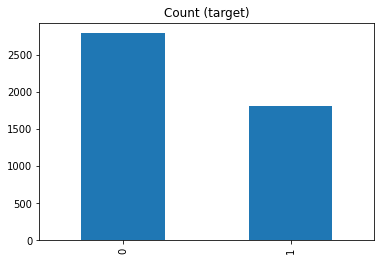

In [108]:
target_count.plot(kind='bar', title='Count (is_spam)')

Majority of the data belong to ham class i.e 0.



## Random under sampling

How its work you had 1813 is spam messages and 2788 is ham messages.

So its unbalance dataset , for do balance we are applying **under-sampling**.

In [105]:
count_class_0, count_class_1 = data.is_spam.value_counts()
spam = data[data['is_spam'] == 1]
ham = data[data['is_spam'] == 0]

Random under-sampling:
1    1813
0    1813
Name: is_spam, dtype: int64


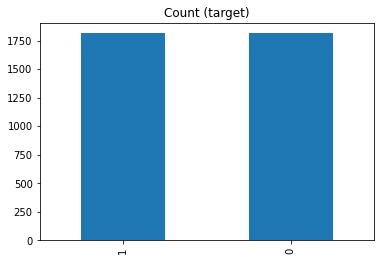

In [106]:
data_class_0_under = ham.sample(count_class_1)
data_test_under = pd.concat([data_class_0_under, spam], axis=0)
print('Random under-sampling:')
print(data_test_under.is_spam.value_counts())
data_test_under.is_spam.value_counts().plot(kind='bar', title='Count (is_spam)');

Right here, 1813 samples random picked up from ham which represent with 0 .

Total ham data -2788( randomly picked 1813 data point from ham class by under-sampling)

Total spam data — 1813

Total data is 1813+1813 with equal ratio.

So, data is balanced using under-sampling.

# Modelling

In [104]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Splitting and Training Dataset(80-20 sets)

Let's split our dataset into four subsets, X_train, X_test, y_train, and y_test.

In [24]:
# splitting our dataset into test and train dataset 
spam_train, spam_test = train_test_split(spam, train_size=0.8)
ham_train, ham_test = train_test_split(ham, train_size=0.8)

In [25]:
X_train = ham_train.append(spam_train)
y_train = X_train.pop('is_spam')

In [26]:
X_test = ham_test.append(spam_test)
y_test = X_test.pop('is_spam')

## printing Output

In [33]:
print(X_train)

        0     1     2    3     4     5   ...     51     52     53     54  55   56
3684  0.00  0.00  0.00  0.0  0.00  0.00  ...  0.000  0.000  0.000  1.000   1    3
3180  0.00  0.00  0.00  0.0  1.47  0.00  ...  0.000  0.000  0.000  3.037  15   82
2445  0.12  0.00  0.25  0.0  0.00  0.00  ...  0.000  0.036  0.000  3.167  32  491
2593  0.00  0.00  0.18  0.0  0.00  0.09  ...  0.000  0.000  0.000  2.022  19  451
3802  0.00  0.00  0.50  0.0  0.50  0.00  ...  0.055  0.000  0.000  4.275  45  248
...    ...   ...   ...  ...   ...   ...  ...    ...    ...    ...    ...  ..  ...
635   0.00  0.64  0.64  0.0  0.32  0.00  ...  1.065  0.000  0.000  3.932  61  291
1598  0.09  0.09  1.14  0.0  0.38  0.00  ...  0.591  0.000  0.000  3.280  31  771
453   0.00  0.00  0.00  0.0  0.00  0.00  ...  0.000  0.000  0.000  1.000   1    2
1445  0.20  0.10  0.70  0.0  1.10  0.20  ...  0.530  0.406  0.123  9.781  84  851
1344  0.09  0.00  0.27  0.0  0.36  0.09  ...  0.257  0.032  0.032  3.689  69  535

[3680 rows x 57

In [34]:
print(X_test)

        0     1     2    3     4     5   ...     51     52     53     54  55   56
4249  0.00  0.35  0.35  0.0  0.00  0.35  ...  0.000  0.000  0.000  1.787  11  118
3037  0.00  0.00  0.00  0.0  3.84  0.00  ...  0.000  0.000  0.000  1.000   1    7
1881  0.00  0.00  0.00  0.0  0.00  0.00  ...  0.000  0.000  0.000  1.600   9   24
2108  0.00  0.00  0.00  0.0  0.00  0.00  ...  0.000  0.000  0.000  1.583   8   38
1981  0.81  0.00  0.81  0.0  0.81  0.00  ...  0.370  0.000  0.000  5.375  69  129
...    ...   ...   ...  ...   ...   ...  ...    ...    ...    ...    ...  ..  ...
1521  0.00  0.00  0.00  0.0  0.00  0.00  ...  0.000  0.000  0.000  1.545   4   17
788   0.09  0.00  0.27  0.0  0.36  0.09  ...  0.252  0.031  0.031  3.816  69  542
1776  0.00  0.21  0.43  0.0  0.65  0.00  ...  0.960  0.128  0.128  8.080  70  501
589   0.00  0.00  0.00  0.0  0.00  0.00  ...  0.000  0.000  0.000  2.769  15   36
481   0.00  0.00  0.00  0.0  0.00  0.00  ...  4.347  0.000  0.000  1.000   1    2

[921 rows x 57 

In [36]:
print(y_train)

3684    0
3180    0
2445    0
2593    0
3802    0
       ..
635     1
1598    1
453     1
1445    1
1344    1
Name: is_spam, Length: 3680, dtype: int64


In [37]:
print(y_test)

4249    0
3037    0
1881    0
2108    0
1981    0
       ..
1521    1
788     1
1776    1
589     1
481     1
Name: is_spam, Length: 921, dtype: int64


## Fitting our model

In [ ]:
# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited

In [27]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


MultinomialNB()

In [28]:
spam_bayes = MultinomialNB()
spam_bayes.fit(X_train, y_train)

MultinomialNB()

## Evaluating the Model

In [ ]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set

In [29]:
spam_bayes.score(X_test, y_test)

0.8078175895765473

Comparing our predicted score with our actual score to determine our model prediction power

In [114]:
spam_bayes.score(X_train, y_train)

0.7891304347826087

## Plotting Confusion Matrix and Classification Reports

In [110]:
# getting y_pred by predicting over X_text and flattening it
y_pred = spam_bayes.predict(X_test)
y_pred = y_pred.flatten() # require to be in one-dimensional array , for easy manipulation

In [111]:
# importing confusion maxtrix

from sklearn.metrics import confusion_matrix , classification_report

# creating confusion matrix 

cm = confusion_matrix(y_test,y_pred)

cm

array([[477,  81],
       [ 96, 267]])

Text(33.0, 0.5, 'Actual')

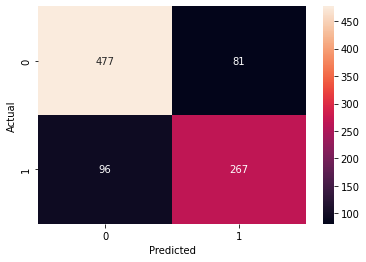

In [115]:
# plotting as a graph - importing seaborn
import seaborn as sns
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

As can be seen for X-axis – We have Predicted Values, For Y-axis – We have Actual Values. Also at diagonal, we have model correct predictions.

Through the graph we can see that out of a total, 477 times the mail was ham (0) and the model predicted it right and for 267 times it was spam and model predicted spam(1), so overall we have created a good model, however one can experiment with the parameters, layers and network architecture to increase it

**Classification report is also plotted similarly:**

In [113]:
# printing classification report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       558
           1       0.77      0.74      0.75       363

    accuracy                           0.81       921
   macro avg       0.80      0.80      0.80       921
weighted avg       0.81      0.81      0.81       921



Here also it is evident that the model is a good one as recall and accuracy us good

## Splitting and Training Dataset(70-30 sets)

Let's split our dataset into four subsets, X_train, X_test, y_train, and y_test.

In [116]:
# splitting our dataset into train and test datas
spam_train, spam_test = train_test_split(spam, train_size=0.7)
ham_train, ham_test = train_test_split(ham, train_size=0.7)

In [117]:
X_train = ham_train.append(spam_train)
y_train = X_train.pop('is_spam')

In [118]:
X_test = ham_test.append(spam_test)
y_test = X_test.pop('is_spam')

## Fitting model

In [119]:
# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
#
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [120]:
spam_bayes = MultinomialNB()
spam_bayes.fit(X_train, y_train)

MultinomialNB()

## Evaluating the Model

In [121]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set

In [122]:
spam_bayes.score(X_test, y_test)

0.8102824040550326

Comparing our predicted score with our actual score to determine our model prediction power

In [123]:
spam_bayes.score(X_train, y_train)

0.8031055900621118

## Plotting Confusion Matrix and Classification Reports

In [124]:
# getting y_pred by predicting over X_text and flattening it
y_pred = spam_bayes.predict(X_test)
y_pred = y_pred.flatten() # require to be in one-dimensional array , for easy manipulation

In [125]:
# importing confusion maxtrix

from sklearn.metrics import confusion_matrix , classification_report

# creating confusion matrix 

cm = confusion_matrix(y_test,y_pred)

cm

array([[709, 128],
       [134, 410]])

Text(33.0, 0.5, 'Actual')

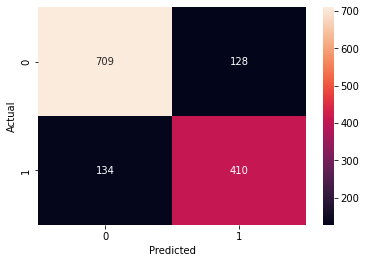

In [126]:
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

As can be seen for X-axis – We have Predicted Values, For Y-axis – We have Actual Values. Also at diagonal, we have model correct predictions.

Through the graph we can see that out of a total, 709 times the mail was ham (0) and the model predicted it right and for 410 times it was spam and model predicted spam(1), so overall we have created a good model, however one can experiment with the parameters, layers and network architecture to increase it

**Classification report is also plotted similarly:**

In [127]:
# printing classification report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       837
           1       0.76      0.75      0.76       544

    accuracy                           0.81      1381
   macro avg       0.80      0.80      0.80      1381
weighted avg       0.81      0.81      0.81      1381



Here also it is evident that the model is a good one as recall and accuracy us good

## Splitting and Training Dataset(60-40 sets)
Let's split our dataset into four subsets, X_train, X_test, y_train, and y_test.

In [128]:
# splitting our dataset into test and train datasets
spam_train, spam_test = train_test_split(spam, train_size=0.6)
ham_train, ham_test = train_test_split(ham, train_size=0.6)

In [129]:
X_train = ham_train.append(spam_train)
y_train = X_train.pop('is_spam')

In [130]:
X_test = ham_test.append(spam_test)
y_test = X_test.pop('is_spam')

## Fitting our model

In [131]:
# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
#

In [132]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [133]:
spam_bayes = MultinomialNB()
spam_bayes.fit(X_train, y_train)

MultinomialNB()

## Evaluating the Model

In [134]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set

In [135]:
spam_bayes.score(X_test, y_test)

0.7958740499457112

Comparing our predicted score with our actual score to determine our model prediction power

In [136]:
spam_bayes.score(X_train, y_train)

0.7814425516491482

## Plotting Confusion Matrix and Classification Reports

In [137]:
# getting y_pred by predicting over X_text and flattening it
y_pred = spam_bayes.predict(X_test)
y_pred = y_pred.flatten() # require to be in one-dimensional array , for easy manipulation

In [138]:
# importing confusion maxtrix

from sklearn.metrics import confusion_matrix , classification_report

# creating confusion matrix 

cm = confusion_matrix(y_test,y_pred)

cm

array([[944, 172],
       [204, 522]])

Text(33.0, 0.5, 'Actual')

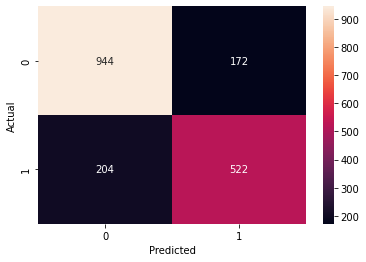

In [139]:
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

As can be seen for X-axis – We have Predicted Values, For Y-axis – We have Actual Values. Also at diagonal, we have model correct predictions.

Through the graph we can see that out of a total, 944 times the mail was ham (0) and the model predicted it right and for 522 times it was spam and model predicted spam(1), so overall we have created a good model, however one can experiment with the parameters, layers and network architecture to increase it

**Classification report is also plotted similarly:**

In [140]:
# printing classification report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1116
           1       0.75      0.72      0.74       726

    accuracy                           0.80      1842
   macro avg       0.79      0.78      0.78      1842
weighted avg       0.79      0.80      0.80      1842



Here also it is evident that the model is a good one as recall and accuracy us good

# Conclusion

From the three splits, we see that model-score decreases as the splitting size increases

We also notice that recall and f1-score remains the same for all the splits

Found the naive bayes provides max accuracy of 80%.

Found high precision and recall score of 0.82 and 0.85 respectively.

Confusion matrix shows high classification accuracy with only a few values incorrect.

Overall model fit is good.

# Challenging the solution

We challenge our solution by performing the mse of the predicted values